In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import os
import sys

parent = os.path.dirname(os.getcwd())  # workaround to import from utils/
sys.path.append(parent)

from utils.db_utils import df_from_snowflake
pd.option_context('display.max_rows', None,)
pp.style.use('ggplot')

In [120]:
with open ('sql_template/revenue.sql', 'r') as sql_file:
    df = df_from_snowflake(sql_file.read())
df.set_index('DT', inplace=True)

In [74]:
df

,ID,USERS,SESSIONS,REVENUES,BOOKINGS,SEARCHES,UWB,CUM_USERS,CUM_REVENUES,CUM_BOOKINGS,CUM_UWB,RPU,BOOKING_PER_USER
DT,,,,,,,,,,,,,
2024-02-27,e3887v0,4256,4678,1849.314308,11.0000000000,12493,11,4256,1849.314308,11.0000000000,11,0.434519,0.002584586466
2024-02-27,e3887v1,4198,4594,1644.403960,13.0000000000,12254,13,4198,1644.403960,13.0000000000,13,0.391711,0.003096712720
2024-02-28,e3887v0,10653,12675,4189.956089,30.0000000000,30097,29,14909,6039.270397,41.0000000000,40,0.405075,0.002750016768
2024-02-28,e3887v1,10668,12783,4648.861867,31.0000000000,31013,30,14866,6293.265827,44.0000000000,43,0.423333,0.002959773981
2024-02-29,e3887v0,9758,11652,3084.462846,19.0000000000,29508,19,24667,9123.733243,60.0000000000,59,0.369876,0.002432399562
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,e3887v1,16367,19419,4532.027696,34.0000000000,47063,33,1499197,527760.023690,5160.0000000000,4992,0.352028,0.003441842533
2024-06-01,e3887v0,17515,20609,4894.399355,36.0000000000,53127,36,1508037,514202.082118,4733.0000000000,4550,0.340974,0.003138517158
2024-06-01,e3887v1,17901,21062,4105.992873,32.0000000000,54936,31,1517098,531866.016563,5192.0000000000,5023,0.350581,0.003422323410


In [52]:
df.groupby('ID').sum()

,USERS,SESSIONS,REVENUES,BOOKINGS,SEARCHES,CUM_USERS,CUM_REVENUES,CUM_BOOKINGS,RPU,BOOKING_PER_USER
ID,,,,,,,,,,
e3887v0,1531827,1826602,521893.662614,4782.0000000000,4797212,72715526,2.611066e+07,251813.0000000000,36.208639,0.340809200016
e3887v1,1541348,1844726,538693.454982,5247.0000000000,4883587,73094714,2.611313e+07,270932.0000000000,35.726925,0.363486793320


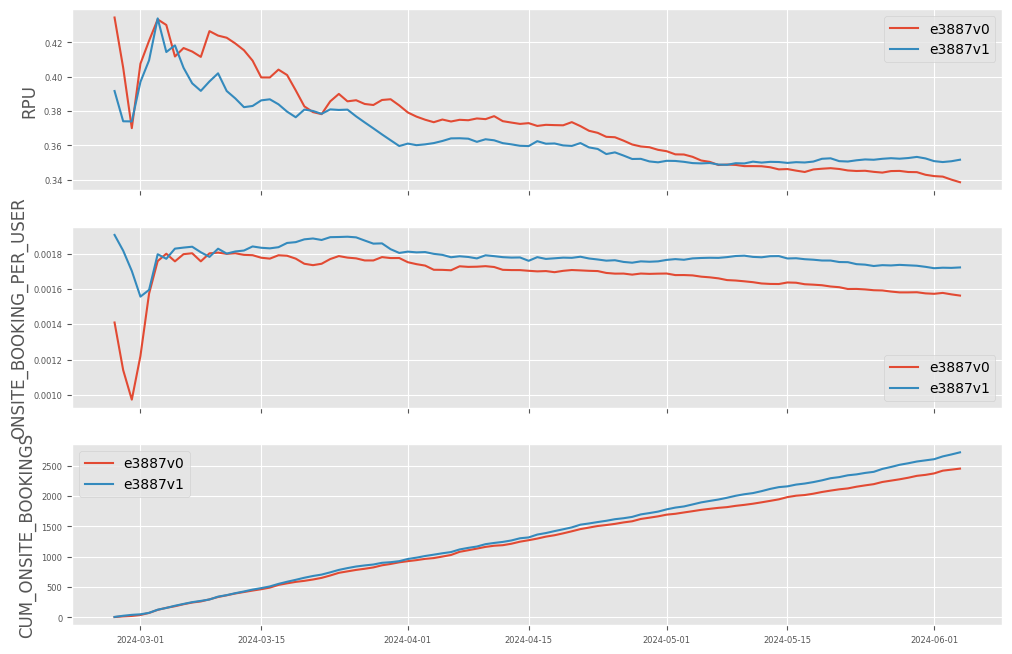

In [121]:
_, ax = pp.subplots(nrows=3, ncols=1, sharex=True, figsize=(12,8))

#first_glance.groupby('ID')['RPU'].plot(kind='line', ax=ax )
ax[0].plot(df[df['ID']=='e3887v0']['RPU'], label = 'e3887v0')
ax[0].plot(df[df['ID']=='e3887v1']['RPU'], label = 'e3887v1')
ax[0].legend()
ax[0].set_ylabel('RPU')
ax[0].tick_params(axis='both', which='both', labelsize=6)

ax[1].plot(df[df['ID']=='e3887v0']['ONSITE_BOOKING_PER_USER'], label = 'e3887v0')
ax[1].plot(df[df['ID']=='e3887v1']['ONSITE_BOOKING_PER_USER'], label = 'e3887v1')
ax[1].legend()
ax[1].set_ylabel('ONSITE_BOOKING_PER_USER')
ax[1].tick_params(axis='both', which='both', labelsize=6)

ax[2].plot(df[df['ID']=='e3887v0']['CUM_ONSITE_BOOKINGS'], label = 'e3887v0')
ax[2].plot(df[df['ID']=='e3887v1']['CUM_ONSITE_BOOKINGS'], label = 'e3887v1')
ax[2].legend()
ax[2].set_ylabel('CUM_ONSITE_BOOKINGS')
ax[2].tick_params(axis='both', which='both', labelsize=6)



In [143]:
df

,ID,USERS,SESSIONS,REVENUES,ONSITE_BOOKINGS,SEARCHES,UWOB,CUM_USERS,CUM_REVENUES,CUM_ONSITE_BOOKINGS,CUM_UWOB,RPU,ONSITE_BOOKING_PER_USER
DT,,,,,,,,,,,,,
2024-02-27,e3887v0,4256,4678,1849.501967,6.0000000000,12493,6,4256,1849.501967,6.0000000000,6,0.434563,0.001409774436
2024-02-27,e3887v1,4198,4594,1644.226383,8.0000000000,12254,8,4198,1644.226383,8.0000000000,8,0.391669,0.001905669366
2024-02-28,e3887v0,10653,12675,4192.721225,11.0000000000,30097,10,14909,6042.223192,17.0000000000,16,0.405274,0.001140250855
2024-02-28,e3887v1,10666,12781,3914.988691,19.0000000000,31007,18,14864,5559.215073,27.0000000000,26,0.374005,0.001816469322
2024-02-29,e3887v0,9758,11652,3084.401579,7.0000000000,29508,7,24667,9126.624772,24.0000000000,23,0.369993,0.000972959825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-02,e3887v1,24191,28985,7665.298405,46.0000000000,80909,45,1541251,539770.865306,2651.0000000000,2589,0.350216,0.001720031325
2024-06-03,e3887v0,18870,22497,3720.743498,17.0000000000,57082,17,1550607,527141.494226,2433.0000000000,2386,0.339958,0.001569062954
2024-06-03,e3887v1,19492,23190,7570.750062,32.0000000000,58017,30,1560743,547341.615368,2683.0000000000,2619,0.350693,0.001719053041


In [139]:
with open ('sql_template/subscription_rate.sql', 'r') as sql_file:
    crm = df_from_snowflake(sql_file.read())
    
crm.sort_values(by='DT', ignore_index=True, inplace=True)
crm.set_index('DT', inplace=True)

Text(0, 0.5, 'CUM_SUBSCRIBERS')

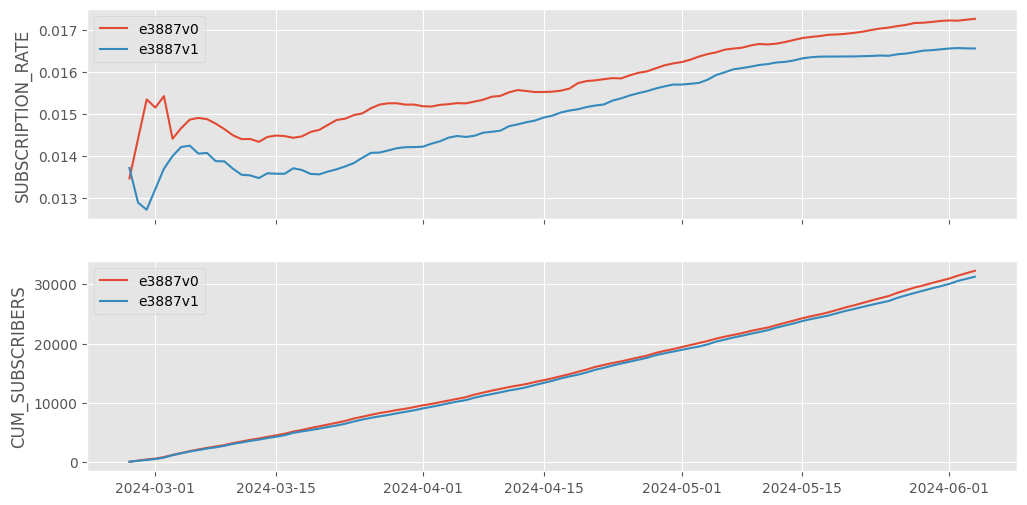

In [141]:
_, ax = pp.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,6))


ax[0].plot(crm[crm['ID']=='e3887v0']['SUBSCRIPTION_RATE'], label = 'e3887v0')
ax[0].plot(crm[crm['ID']=='e3887v1']['SUBSCRIPTION_RATE'], label = 'e3887v1')
ax[0].legend()
ax[0].set_ylabel('SUBSCRIPTION_RATE')


ax[1].plot(crm[crm['ID']=='e3887v0']['CUM_SUBSCRIBERS'], label = 'e3887v0')
ax[1].plot(crm[crm['ID']=='e3887v1']['CUM_SUBSCRIBERS'], label = 'e3887v1')
ax[1].legend()
ax[1].set_ylabel('CUM_SUBSCRIBERS')


In [142]:
crm

,ID,COOKIE_USER_IDS,SUBSCRIBERS,CUM_USERS,CUM_SUBSCRIBERS,SUBSCRIPTION_RATE
DT,,,,,,
2024-02-27,e3887v0,4678,63,4678,63,0.013467
2024-02-27,e3887v1,4594,63,4594,63,0.013714
2024-02-28,e3887v0,12675,187,17353,250,0.014407
2024-02-28,e3887v1,12781,161,17375,224,0.012892
2024-02-29,e3887v0,11652,195,29005,445,0.015342
...,...,...,...,...,...,...
2024-06-02,e3887v0,28317,479,1826472,31434,0.017210
2024-06-03,e3887v1,23190,372,1867777,30918,0.016553
2024-06-03,e3887v0,22497,429,1848969,31863,0.017233


In [123]:
with open ('sql_template/crm_subscriber.sql', 'r') as sql_file:
    subscriber = df_from_snowflake(sql_file.read())



In [130]:
subscriber

,ORIGIN_SOURCE,'e3887v0','e3887v1'
0,account_apple,93,126
1,account_email,956,1330
2,account_facebook,41,37
3,account_facebook_smartlock,133,66
4,account_google,442,378
5,account_google_smartlock,23384,22081
6,booking,4045,4337
7,casamundo_import,155,155
8,casevacanza_import,145,186
9,customer_support,168,182


<Axes: xlabel='DT'>

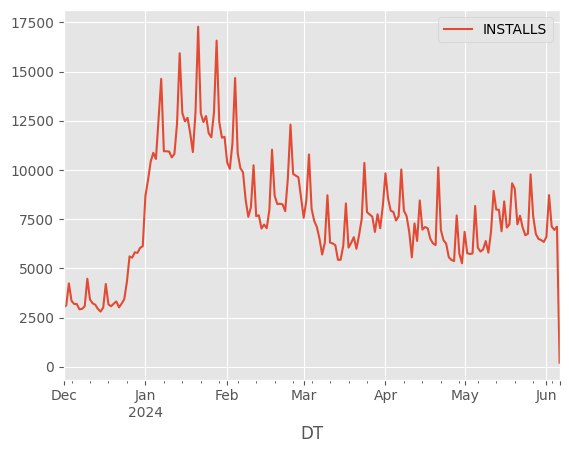

In [145]:
with open ('sql_template/appsflyer_install.sql', 'r') as sql_file:
    installs = df_from_snowflake(sql_file.read())

installs.set_index('DT', inplace=True)

installs.plot()

In [146]:
with open ('sql_template/large_overlay_click.sql', 'r') as sql_file:
    overlay_clicks = df_from_snowflake(sql_file.read())

overlay_clicks

,ID,SESSIONS,APP_INSTALL_LARGE_OVERLAY
0,e3887v0,1870099,5043
1,e3887v1,1889436,8
